In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import pylab

In [2]:
# Координата
def x_i(a, i, h):
    return a + i * h


# Функции
def u(x):
    return np.sin(x) * np.exp(x)


def f(x):
    return 2 * np.cos(x) * np.exp(x)

In [3]:
# Представление числа в экспоненциальной форме
def exp_form(a):
    return '%e' % a


# Решение 3-хдиагональной СЛАУ методом прогонки
def tridiagonal_matrix_algorithm(a, b, c, d):
    n = len(a)

    if a[0] != 0:
        raise Exception('Ошибка: a[0] должно быть = 0!')

    if c[n - 1] != 0:
        raise Exception('Ошибка: c[n - 1] должно быть = 0!')

    alpha = [0] * n
    beta = [0] * n
    x = [0] * n

    for i in range(1, n):
        alpha[i] = -c[i - 1] / (a[i - 1] * alpha[i - 1] + b[i - 1])
        beta[i] = (d[i - 1] - a[i - 1] * beta[i - 1]) / (
            a[i - 1] * alpha[i - 1] + b[i - 1])

    x[n - 1] = (d[n - 1] - a[n - 1] * beta[n - 1]) / (a[n - 1] * alpha[n - 1] +
                                                      b[n - 1])

    for i in range(n - 2, -1, -1):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]

    return x


# Метод конечных разностей
def finite_difference_method(u, a, b, A, B, h):
    n = int((b - a) / h) + 1  # кол-во узлов
    x = np.array([x_i(a, i, h) for i in range(n)])

    size = n - 2
    a_coeff = [1] * size
    b_coeff = [-2] * size
    c_coeff = [1] * size
    d_coeff = (h**2) * f(x[1:-1])
    d_coeff[0] = d_coeff[0] - A
    d_coeff[-1] = d_coeff[-1] - B
    a_coeff[0] = c_coeff[-1] = 0

    y = np.array([A])
    y = np.append(
        y, tridiagonal_matrix_algorithm(a_coeff, b_coeff, c_coeff, d_coeff))
    y = np.append(y, [B])

    return x, y

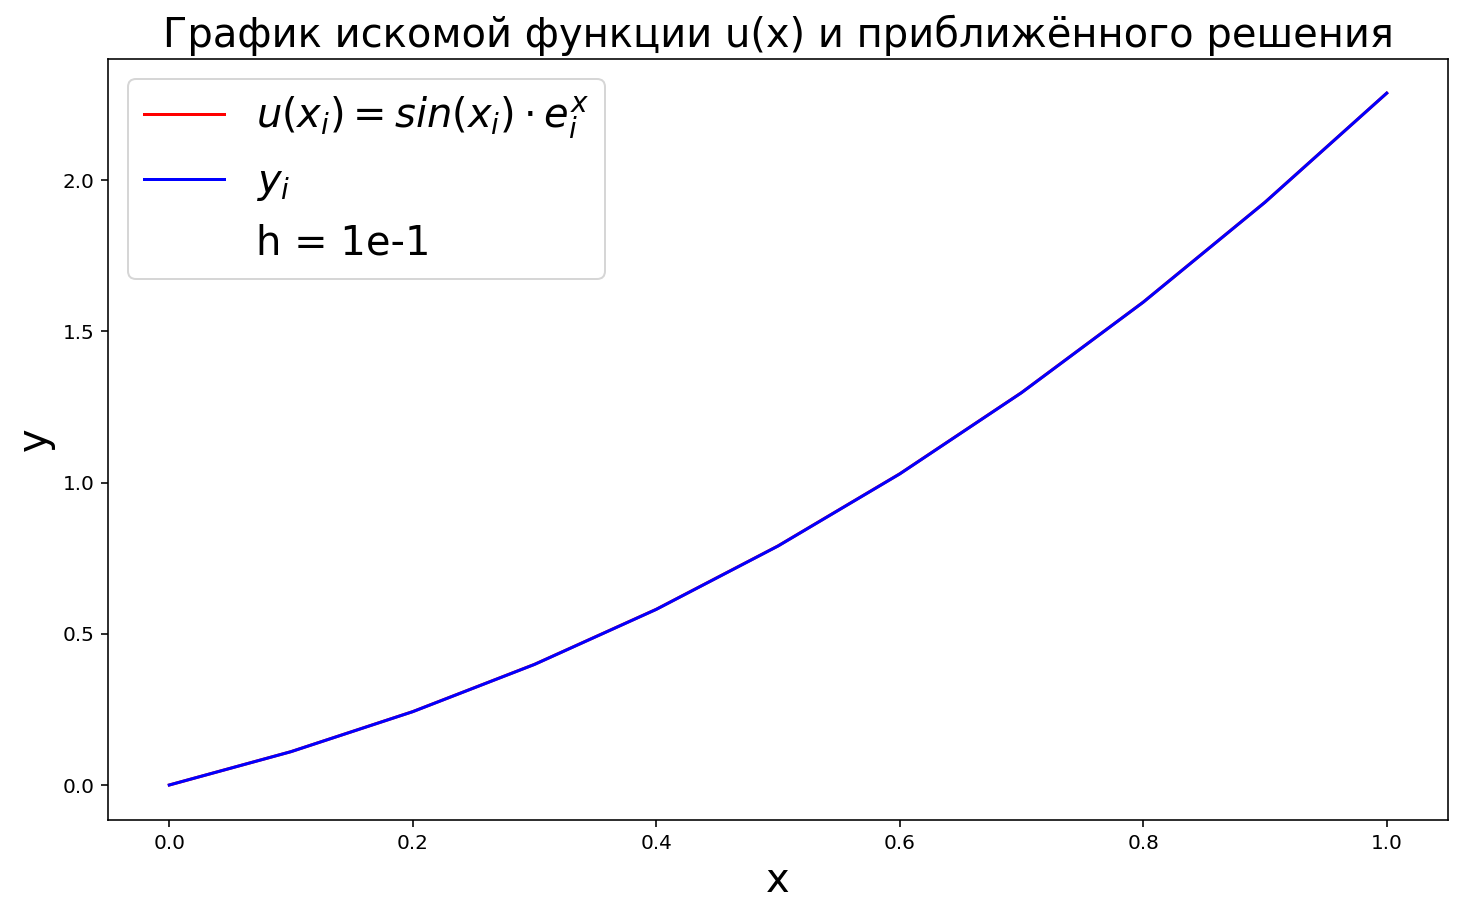

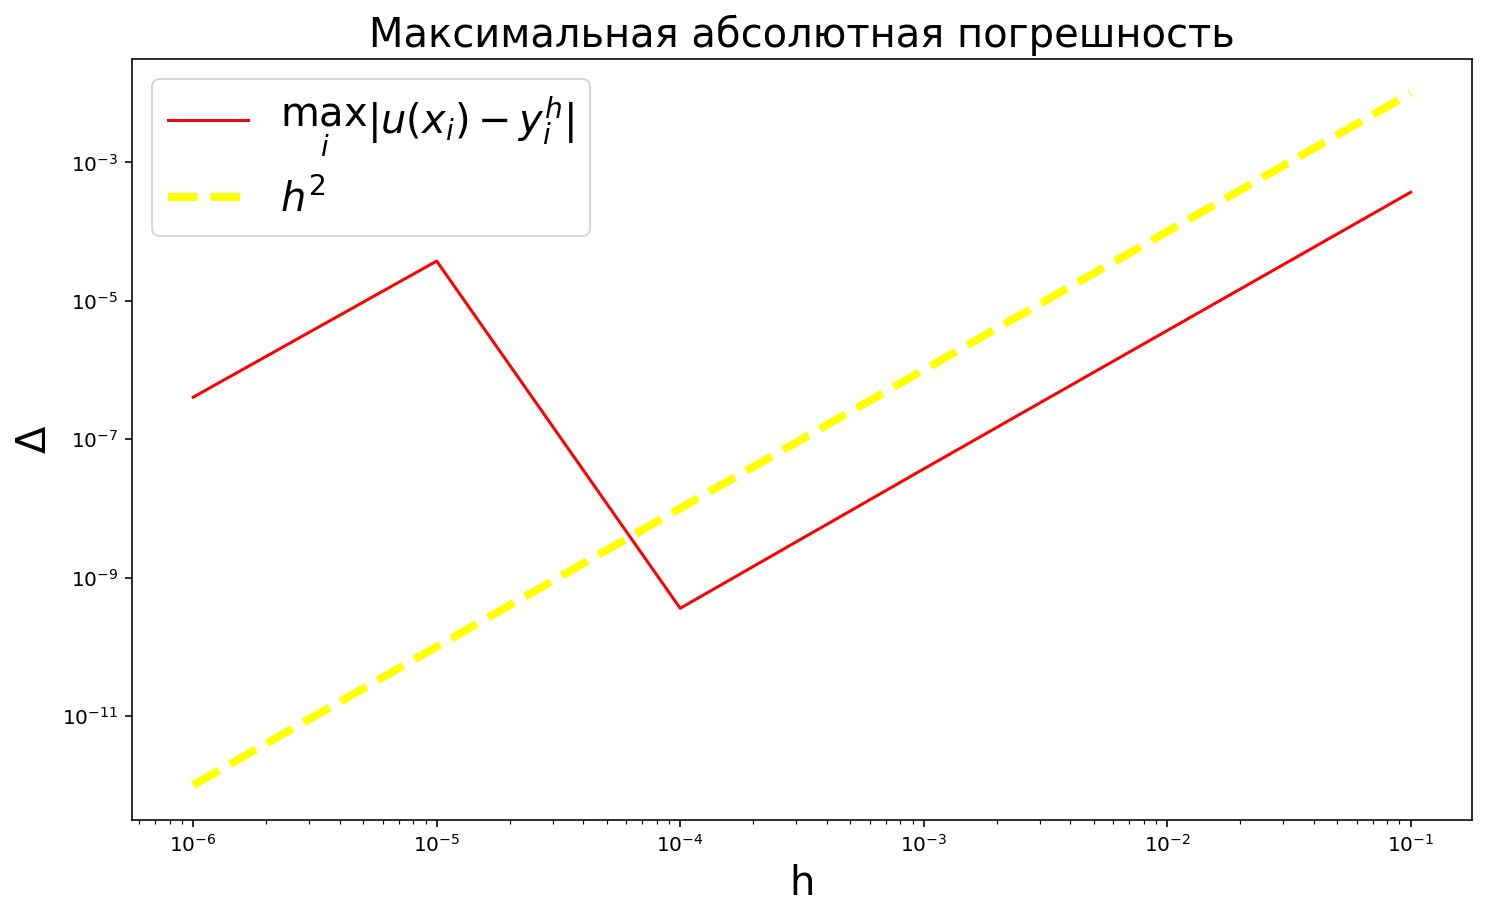

h,Максимальная абсолютная погрешность
1e-6,4.042109e-07
1e-5,3.756035e-05
1e-4,3.593867e-10
1e-3,3.710884e-08
1e-2,3.710662e-06
1e-1,3.704991e-04


In [4]:
a, b = 0, 1
A, B = u(a), u(b)

fig = pylab.figure()
table = pd.DataFrame([], columns=['Максимальная абсолютная погрешность'])
table.columns.name = 'h'

max_exp = 6
h = np.array([10 ** (-k) for k in range(max_exp, 0, -1)])
max_error = np.array([])

for i in range(len(h)):
    k = max_exp - i
    x, y = finite_difference_method(u, a, b, A, B, h[i])
    max_err = np.amax(np.absolute(u(x) - y))
    max_error = np.append(max_error, [max_err])
    
    table.loc['1e-' + str(k)] = [exp_form(max_err)]
    

pylab.plot(x, u(x), color='r', label='$%s$' % r"u(x_{i})=sin(x_{i})\cdot e^x_{i}")
pylab.plot(x, y, color='b', label='$%s$' % r"y_{i}")
pylab.plot([], [], ' ', label='h = 1e-' + str(k))
pylab.legend(prop={'size': 20})
pylab.title('График искомой функции u(x) и приближённого решения', fontsize=20)
pylab.xlabel('x', fontsize=20)
pylab.ylabel('y', fontsize=20)
pylab.show()

pylab.plot(h, max_error, color='r', label='$%s$' % r"\max_{i} \left | u(x_{i})-y_{i}^{h} \right |")
pylab.plot(h, h ** 2, linestyle='--', linewidth=4, color='yellow', label=r'$h^2$')
pylab.legend(prop={'size': 20})
pylab.title('Максимальная абсолютная погрешность', fontsize=20)
pylab.xlabel('h', fontsize=20)
pylab.ylabel('Δ', fontsize=20)
pylab.xscale('log')
pylab.yscale('log')
pylab.show()

display(table)